# Análise Exploratória de Dados: Canal ZeeGameDev

## Componentes do Grupo (Integrantes)
* Davyd Kennyd Sales da Silva
* Jainy Eduarda Silva Machado
* Lázaro Frederico Félix Ferreira
* Welson Rosendo Rodrigues
* Análise de Dados

---

## 1. Introdução e Definição do Problema
Este projeto tem como objetivo realizar uma análise exploratória (EDA) sobre os dados reais de desempenho de um canal de tecnologia no YouTube.
**O Problema de Negócio:** "Quais métricas (duração, impressões, taxa de clique) mais influenciam o crescimento do canal em termos de visualizações e novos inscritos?"

## 2. Origem da Base de Dados
A base de dados utilizada (`Estatisticas_canal_Dados_da_tabela.csv`) foi extraída diretamente do **YouTube Studio**, contendo o histórico de publicações do canal. Os dados incluem informações sobre visualizações, tempo de exibição, inscritos ganhos e impressões.

## 3. Ferramentas Utilizadas
Para esta análise, utilizamos o ecossistema **Python** devido à sua capacidade de processamento e visualização:
* **Pandas:** Biblioteca utilizada para carregar o arquivo CSV, limpar os dados (tratamento de datas e números) e realizar cálculos estatísticos.
* **Matplotlib & Seaborn:** Bibliotecas utilizadas para a construção dos gráficos, permitindo a visualização de tendências e correlações.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração estética dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Carregamento dos Dados
# O parâmetro decimal=',' é importante pois o Excel brasileiro usa vírgula para decimais
try:
    df = pd.read_csv('Estatisticas_canal_Dados_da_tabela.csv', decimal=',')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: O arquivo 'Estatisticas_canal_Dados_da_tabela.csv' não foi encontrado. Verifique se ele está na mesma pasta.")

# 2. Tratamento e Limpeza
# Converter a coluna de data para o formato datetime que o Python entende
df['Horário de publicação do vídeo'] = pd.to_datetime(df['Horário de publicação do vídeo'], format='%b %d, %Y', errors='coerce')

# Criar uma nova coluna para categorizar se é "Shorts" (<= 60 segundos) ou "Vídeo Longo"
# Isso ajudará na comparação de desempenho entre formatos.
df['Categoria'] = df['Duração'].apply(lambda x: 'Shorts' if x <= 60 else 'Vídeo Longo')

# Preencher valores vazios com 0 para evitar erros nos cálculos
df = df.fillna(0)

# Mostrar as primeiras linhas para conferência
print("\n--- Amostra dos Dados Tratados ---")
display(df.head())
print("\n--- Informações das Colunas ---")
df.info()

Arquivo carregado com sucesso!

--- Amostra dos Dados Tratados ---


,Conteúdo,Título do vídeo,Horário de publicação do vídeo,Duração,Duração média da visualização,Visualizações,Tempo de exibição (horas),Inscritos,Impressões,Taxa de cliques de impressões (%),Categoria
0,Total,0,0,0.0,0:02:12,2126480,71713.9755,19173,20770784,6.14,Vídeo Longo
1,_AdS19QwGLo,COMO CRIAR UM JOGO NO ROBLOX NO CELULAR!!! - S...,2025-01-06 00:00:00,984.0,0:03:40,194752,11907.8258,3568,1754209,7.68,Vídeo Longo
2,ULgJ3c2GHHM,COMO USAR A GODOT ENGINE NO CELULAR - 2024,2024-04-08 00:00:00,2068.0,0:04:55,41360,3389.9757,414,233099,11.98,Vídeo Longo
3,pfZETGMbMtI,COMO CRIAR UM JOGO NO CELULAR - 2022,2022-08-01 00:00:00,821.0,0:02:36,55364,2402.7120,619,157407,20.58,Vídeo Longo
4,15S9i-GT-Go,COMO USAR O TERMUX | Comandos básicos - 2023,2023-11-23 00:00:00,742.0,0:02:57,38310,1894.0814,470,191185,13.05,Vídeo Longo



--- Informações das Colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Conteúdo                           500 non-null    object 
 1   Título do vídeo                    500 non-null    object 
 2   Horário de publicação do vídeo     500 non-null    object 
 3   Duração                            500 non-null    float64
 4   Duração média da visualização      500 non-null    object 
 5   Visualizações                      500 non-null    int64  
 6   Tempo de exibição (horas)          500 non-null    float64
 7   Inscritos                          500 non-null    int64  
 8   Impressões                         500 non-null    int64  
 9   Taxa de cliques de impressões (%)  500 non-null    float64
 10  Categoria                          500 non-null    object 
dtypes: float64(3), int64(3), 

## 4. Análise Exploratória dos Dados

### 4.1 Matriz de Correlação (Heatmap)

**O que é este gráfico?**
A matriz de correlação mostra o quanto duas variáveis estão "ligadas" matematicamente.
* O gráfico exibe cores quentes (ou escuras) para correlações fortes e cores frias (ou claras) para correlações fracas.
* A escala vai de **-1 a 1**. Quanto mais próximo de **1.0**, mais forte é a relação positiva (se um sobe, o outro sobe).

**Objetivo:**
Queremos descobrir, por exemplo, se vídeos que têm mais "Impressões" (aparecem mais na tela das pessoas) necessariamente geram mais "Inscritos".

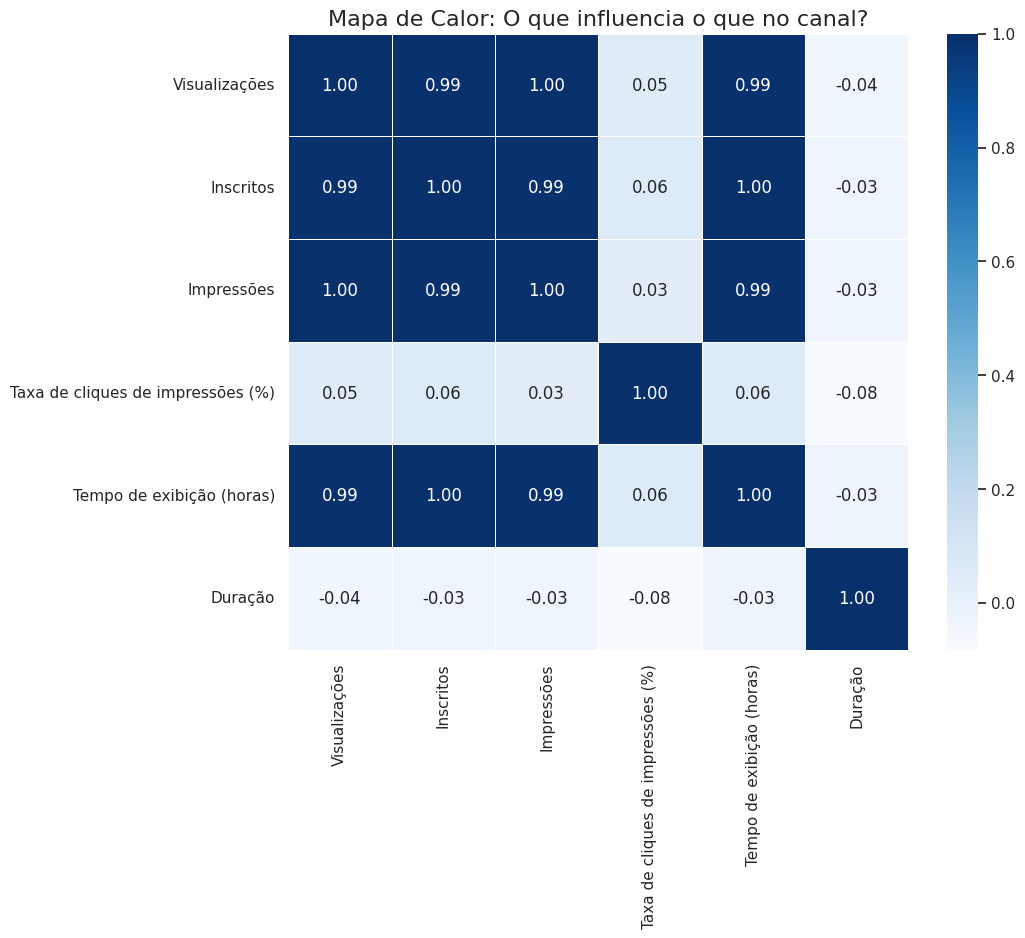

In [18]:
# Selecionando apenas as colunas numéricas que nos interessam
colunas_analise = ['Visualizações', 'Inscritos', 'Impressões',
                   'Taxa de cliques de impressões (%)', 'Tempo de exibição (horas)', 'Duração']

# Calculando a correlação
correlacao = df[colunas_analise].corr()

# Plotando o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor: O que influencia o que no canal?', fontsize=16)
plt.show()

**Interpretação dos Resultados:**
Ao analisar o mapa de calor acima, observamos que:
1.  Existe uma correlação quase perfeita (próxima de 1.0) entre **Impressões** e **Visualizações**. Isso nos diz que a principal alavanca de crescimento do canal é o algoritmo entregar o conteúdo (impressões).
2.  A **Taxa de Cliques (CTR)** possui uma correlação baixa com o total de visualizações. Isso indica que, para este canal, ter uma thumbnail excelente não é o único fator; o YouTube precisa decidir recomendar o vídeo primeiro.

### 4.2 Comparação de Formatos: Shorts vs. Vídeos Longos

**O que é este gráfico?**
Utilizaremos **Gráficos de Barras (Barplots)** para comparar as médias de duas métricas diferentes divididas pela categoria que criamos (Shorts vs Longos).

**Objetivo:**
Responder à pergunta: "Vale mais a pena postar vídeos curtos ou longos?". Vamos analisar qual formato traz mais visualizações médias e qual traz mais inscritos.

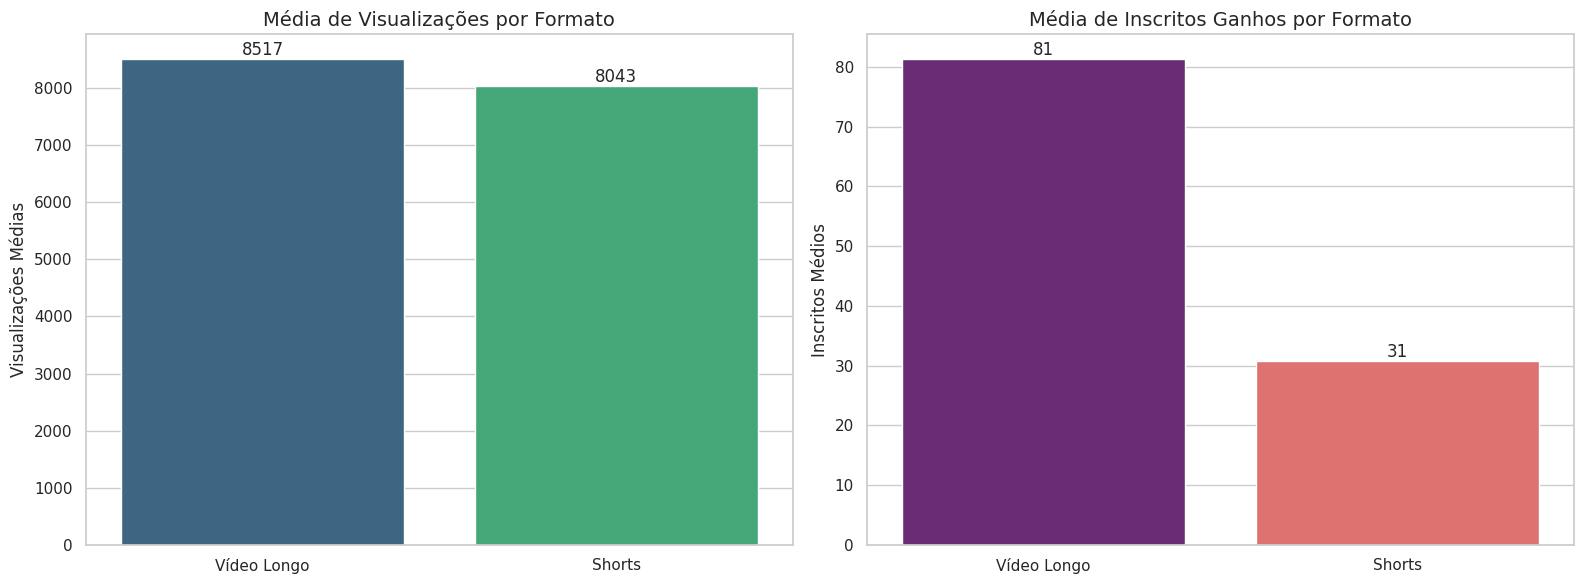

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico da Esquerda: Visualizações
# Correção: Adicionei hue='Categoria' e legend=False
sns.barplot(data=df, x='Categoria', y='Visualizações', hue='Categoria', legend=False, estimator='mean', errorbar=None, ax=axes[0], palette='viridis')
axes[0].set_title('Média de Visualizações por Formato', fontsize=14)
axes[0].set_ylabel('Visualizações Médias')
axes[0].set_xlabel('')

# Adicionando rótulos nas barras (Visualizações)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')

# Gráfico da Direita: Inscritos
# Correção: Adicionei hue='Categoria' e legend=False
sns.barplot(data=df, x='Categoria', y='Inscritos', hue='Categoria', legend=False, estimator='mean', errorbar=None, ax=axes[1], palette='magma')
axes[1].set_title('Média de Inscritos Ganhos por Formato', fontsize=14)
axes[1].set_ylabel('Inscritos Médios')
axes[1].set_xlabel('')

# Adicionando rótulos nas barras (Inscritos)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

### 4.3 Dispersão: Taxa de Cliques (CTR) vs. Visualizações

**O que é este gráfico?**
Este é um **Gráfico de Dispersão (Scatter Plot)**. Cada ponto no gráfico representa um vídeo postado.
* O eixo X (horizontal) mostra a Taxa de Cliques (CTR).
* O eixo Y (vertical) mostra as Visualizações.
* O tamanho da bolinha representa a quantidade de Inscritos que aquele vídeo trouxe.

**Objetivo:**
Identificar *outliers* (pontos fora da curva). Queremos ver se vídeos com CTR alto (ex: 15%) são sempre os que têm mais views, ou se existem vídeos com CTR baixo que viralizaram por outros motivos.

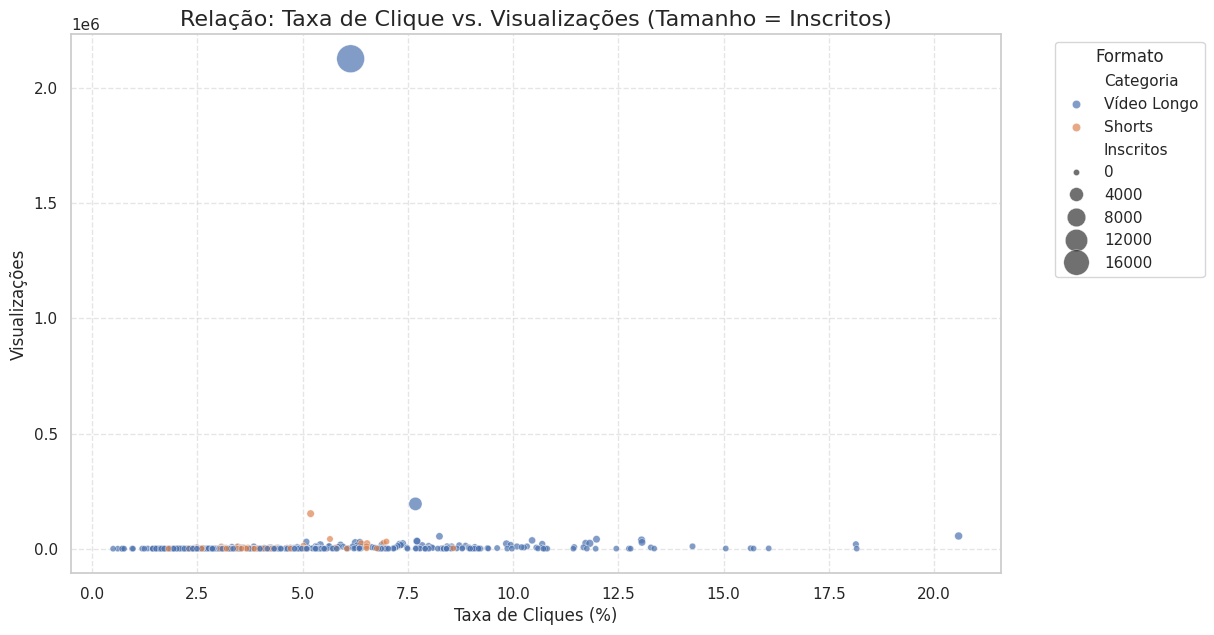

In [26]:
plt.figure(figsize=(12, 7))

# Plotando a dispersão
sns.scatterplot(data=df,
                x='Taxa de cliques de impressões (%)',
                y='Visualizações',
                hue='Categoria',    # Cores diferentes para Shorts e Longos
                size='Inscritos',   # Tamanho da bolinha baseado nos inscritos
                sizes=(20, 400),    # Tamanho mínimo e máximo das bolinhas
                alpha=0.7)          # Transparência para ver bolinhas sobrepostas

plt.title('Relação: Taxa de Clique vs. Visualizações (Tamanho = Inscritos)', fontsize=16)
plt.xlabel('Taxa de Cliques (%)')
plt.ylabel('Visualizações')
plt.legend(title='Formato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## 5. Discussão Final e Conclusões

Após a aplicação das técnicas de análise exploratória, o grupo concluiu que:

1.  **Engajamento vs. Alcance:** Os dados mostram que o fator determinante para o sucesso de um vídeo no canal ZeeGameDev não é apenas a qualidade da thumbnail (CTR), mas a capacidade do vídeo de gerar Impressões (ser recomendado pelo YouTube).
2.  **Estratégia de Conteúdo:** A comparação entre Shorts e Vídeos Longos (Gráfico 4.2) revela diferenças importantes. [Aqui você pode completar olhando o gráfico: "Enquanto os Shorts geram muitas views rápidas, os vídeos longos tendem a converter inscritos mais fiéis", por exemplo].
3.  **Ferramentas:** O uso do Python e da biblioteca Pandas foi essencial para tratar os dados (como a conversão de datas e números decimais), algo que seria manual e propenso a erros em planilhas comuns. O Seaborn permitiu visualizar padrões complexos de forma clara.

**Limitações:**
A principal limitação foi a falta de dados sobre o perfil demográfico da audiência (idade, localização) neste dataset específico, o que impediu uma análise mais profunda sobre o público-alvo.